In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


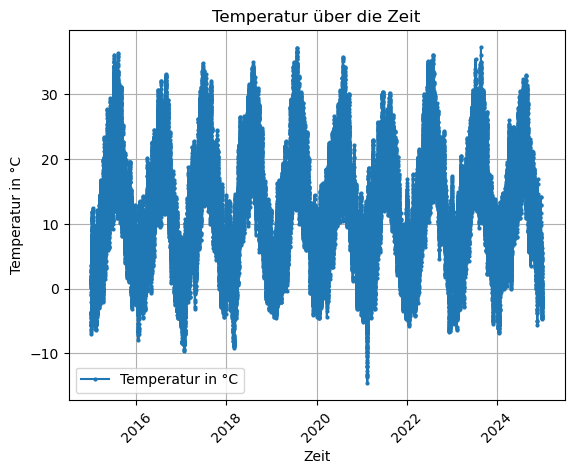

In [36]:
csv_path_hourly = "C:\\Users\silas\PycharmProjects\GBSV_2025\MC1\Data\hourly_data.csv"
if not os.path.exists(csv_path_hourly):
    print(f"Fehler: Datei {csv_path_hourly} nicht gefunden!")
else:
    hourly_dataframe = pd.read_csv(csv_path_hourly, parse_dates=["date"])
    
    # Plot erstellen
    plt.plot(hourly_dataframe["date"], hourly_dataframe["temperature_2m"], linestyle="-", marker="o", markersize=2, label="Temperatur in °C")

    # Achsentitel und Beschriftungen
    plt.xlabel("Zeit")
    plt.ylabel("Temperatur in °C")
    plt.title("Temperatur über die Zeit")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Plot anzeigen
    plt.show()

### Analyse der Temperaturdaten während des Lockdowns und der Nyquist-Shannon-Abtasttheorie

Während der COVID-19-Lockdown-Phase von März bis April 2020 wurden verschiedene Umweltveränderungen beobachtet, darunter auch Schwankungen in den Wetterbedingungen. In dieser Analyse untersuchen wir die Tagesdurchschnittstemperaturen während des Lockdowns in Basel. Unser Ziel ist es, die Nyquist-Shannon-Abtasttheorie auf diese Temperaturdaten anzuwenden und zu bewerten, welche Abtastrate erforderlich ist, um wichtige Temperaturtrends akkurat zu erfassen.

Die Nyquist-Frequenz beschreibt die höchste Frequenz, die in einem Signal noch korrekt rekonstruiert werden kann, wenn eine gegebene Abtastrate verwendet wird. Die Nyquist-Rate ist die minimale Abtastrate, die mindestens das Doppelte der höchsten vorkommenden Frequenz im Signal betragen muss, um Aliasing zu vermeiden. In unserem Fall bedeutet das, dass wir sicherstellen müssen, dass tägliche Temperaturtrends ohne Informationsverlust erfasst werden.

Basierend auf den stündlichen Temperaturen untersuche ich eine tägliche Sampling-Rate, um herauszufinden, wie oft die Temperatur gemessen werden muss, um eine akkurate Darstellung der Schwankungen zu erhalten. Wird zu selten gemessen, könnten wichtige Temperaturveränderungen verloren gehen.

### Fazit
Die Berechnung der Nyquist-Frequenz für die stündlichen Temperaturdaten ergibt eine Nyquist-Frequenz von 0,02 Zyklen pro Tag. Dies bedeutet, dass eine Abtastung einmal pro Tag ausreicht, um relevante Temperaturänderungen ohne Aliasing zu erfassen. Für feinere Temperaturveränderungen wären jedoch höhere Sampling-Raten erforderlich.

Nyquist-Frequenz: 0.02 Zyklen pro Tag


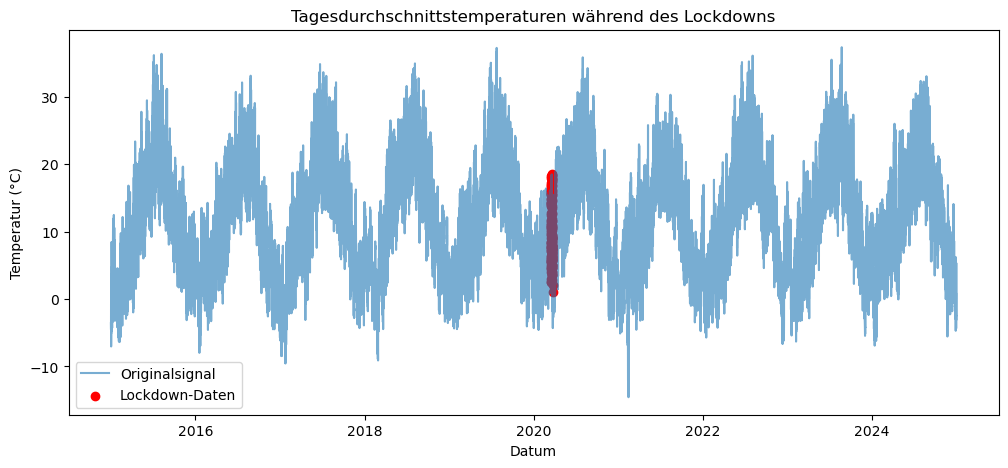

In [44]:
# CSV-Datei laden
df = pd.read_csv(csv_path_hourly, parse_dates=["date"])

# Setze die 'date'-Spalte als Index
df.set_index("date", inplace=True)

# Fehlende Werte in der Temperatur-Spalte entfernen
df = df.dropna(subset=["temperature_2m"])

# Zeitraum der Lockdown-Phase definieren
start = "2020-03-16"
end = "2020-03-22"

# Sicherstellen, dass das Zeitfenster existiert
roi = df.loc[start:end, "temperature_2m"]
full_signal = df["temperature_2m"]

# Berechnung der Nyquist-Frequenz für tägliche Daten
sampling_interval = 24  # 24 Stunden pro Messung (für tägliche Daten)
nyquist_frequency = (1 / (2 * sampling_interval))  # Inverse des doppelten Sampling-Intervalls

print(f"Nyquist-Frequenz: {round(nyquist_frequency,2)} Zyklen pro Tag")

# Plot des Originalsignals
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["temperature_2m"], label="Originalsignal", alpha=0.6)
plt.scatter(roi.index, roi, color="red", label="Lockdown-Daten")
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Tagesdurchschnittstemperaturen während des Lockdowns")
plt.legend()
plt.show()

In dieser Analyse habe ich die Auswirkungen der Nyquist-Rate auf die Abtastung von Temperaturdaten untersucht, die während der COVID-19-Lockdown-Phase in Basel gesammelt wurden. Ich habe zwei Abtastraten gewählt: eine mit 8 Stunden und eine mit 12 Stunden Abtastung, um zu vergleichen, wie sich diese auf die Genauigkeit der Temperaturdaten auswirken.

Die Wahl der 8-Stunden- und 12-Stunden-Abtastraten habe ich getroffen, da ich davon ausgehe, dass eine höhere Abtastrate (3 Mal täglich) genauere Temperaturverläufe liefern kann als eine geringere Abtastrate (2 Mal täglich). Ich habe die Nyquist-Frequenz für jede Abtastrate berechnet, um sicherzustellen, dass die Abtastrate ausreichend hoch ist, um keine wichtigen Informationen zu verlieren. Für die 8-Stunden-Abtastung ergibt sich eine Nyquist-Frequenz von 0,0.0625 Zyklen pro Stunde, während die 12-Stunden-Abtastung eine Nyquist-Frequenz von 0,0416 Zyklen pro Stunde ergibt.

Durch die Visualisierung der Daten habe ich auch Aliasing-Effekte gezeigt, die bei zu niedrigen Abtastraten auftreten können. Wenn ich eine Abtastrate wähle, die zu niedrig ist, z. B. eine 12-Stunden-Abtastung, dann könnten schnellere Temperaturänderungen (z. B. Tageszeit- oder Wetteränderungen) nicht korrekt erfasst werden und zu Verzerrungen führen.

Die Ergebnisse bestätigen, dass eine höhere Abtastrate (8 Stunden) dazu beiträgt, die Temperaturkurve genauer darzustellen, während bei der 12-Stunden-Abtastung einige feine Details der Temperaturveränderungen verloren gehen könnten. Die Wahl der Abtastrate ist also entscheidend für die Genauigkeit der Temperaturdaten.

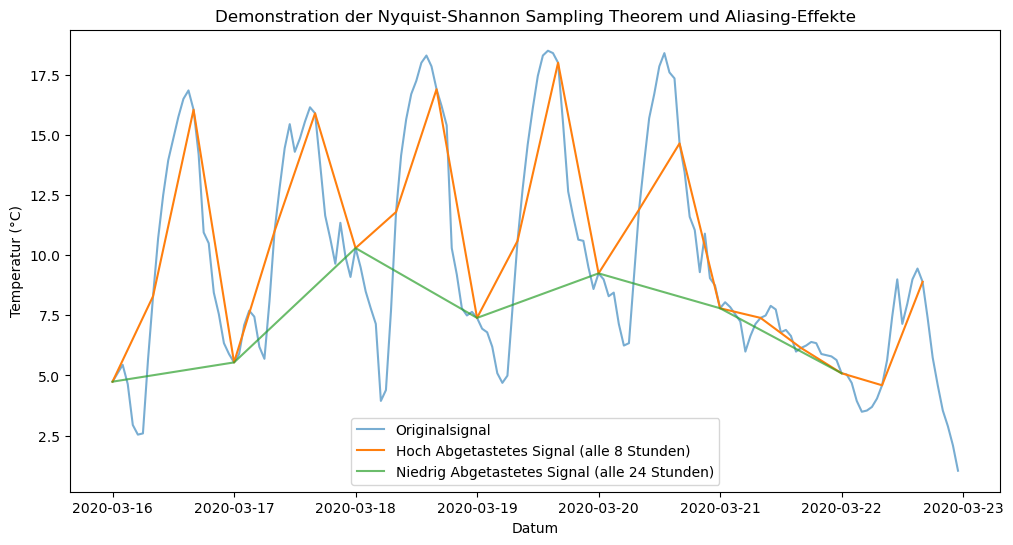

In [56]:
# CSV-Datei laden
df = pd.read_csv(csv_path_hourly, parse_dates=["date"])

# Setze die 'date'-Spalte als Index
df.set_index("date", inplace=True)

# Zeitraum der Lockdown-Phase definieren
start = "2020-03-16"
end = "2020-03-22"

# Sicherstellen, dass das Zeitfenster existiert und nur die relevanten Daten verwenden
roi = df.loc[start:end, "temperature_2m"]

# Nyquist-Frequenz berechnen (Sampling-Intervall = 24 Stunden für tägliche Messungen)
sampling_interval = 24  # 24 Stunden
nyquist_frequency = 1 / (2 * sampling_interval)  # Nyquist-Frequenz (Zyklen pro Tag)

# Abtastung des Signals mit verschiedenen Sampling-Raten
sampling_rate_high = 8  # Abtastung alle 8 Stunden
sampling_rate_low = 24  # Abtastung alle 24 Stunden (zu niedrige Sampling-Rate)

# Funktion zum Abtasten des Signals
def downsample_signal(signal, interval):
    return signal[::interval]

# Hoch-abgetastetes Signal (alle 8 Stunden)
high_sampled_signal = downsample_signal(roi, sampling_rate_high)
# Niedrig-abgetastetes Signal (alle 24 Stunden, Aliasing-Effekt)
low_sampled_signal = downsample_signal(roi, sampling_rate_low)

# Plot der Ergebnisse
plt.figure(figsize=(12, 6))

# Originalsignal (innerhalb des Zeitfensters)
plt.plot(roi.index, roi, label="Originalsignal", alpha=0.6)

# Hoch-abgetastetes Signal (alle 8 Stunden)
plt.plot(roi.index[::sampling_rate_high], high_sampled_signal, linestyle="solid", label="Hoch Abgetastetes Signal (alle 8 Stunden)")

# Niedrig-abgetastetes Signal (mit Aliasing)
plt.plot(roi.index[::sampling_rate_low], low_sampled_signal, linestyle="solid", label="Niedrig Abgetastetes Signal (alle 24 Stunden)", alpha=0.7)

plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Demonstration der Nyquist-Shannon Sampling Theorem und Aliasing-Effekte")
plt.legend()
plt.show()